In [4]:
import sys
import os

# Add the parent directory to the sys.path to avoid 'ModuleNotFoundError'
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import load_json
from src.paths import paths
from src.config import MODEL_NAMES

## 1. Check if metrics have normal distribution

In [5]:
metrics = load_json(paths.get('metric_fold_path'))
auc_scores = {}
for model_name in MODEL_NAMES:
    auc_scores[model_name] = []
    scores = metrics[model_name]
    for score in scores:
        auc_scores[model_name].append(score['roc_auc'])
auc_scores

{'catboost': [0.8986666666666666,
  0.9520000000000001,
  0.9466666666666665,
  0.9241379310344827,
  0.9475862068965518],
 'xgboost': [0.8746666666666667,
  0.9506666666666668,
  0.9586666666666667,
  0.8813793103448276,
  0.9448275862068966],
 'lgbm': [0.8786666666666667,
  0.9586666666666667,
  0.9373333333333334,
  0.88,
  0.9351724137931035],
 'rf': [0.884,
  0.9480000000000001,
  0.92,
  0.8979310344827587,
  0.9186206896551724],
 'svm': [0.8866666666666667,
  0.9413333333333334,
  0.904,
  0.8593103448275863,
  0.9144827586206896],
 'lr': [0.864,
  0.9306666666666666,
  0.9026666666666666,
  0.8606896551724138,
  0.9048275862068966]}

In [35]:
# Shapiro-Wilk test for normality
def sw_test(data):
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test: (Statistic: {stat:.3f}, p-value: {p_value:.3f})")
    if p_value > 0.05:
        print(f"=> The distribution of AUC scores is likely normal (fail to reject H0).")
    else:
        print(f"=> The distribution of AUC scores is not normal (reject H0).")

# Kolmogorov-Smirnov test for normality
def ks_test(data):
    stat, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"Kolmogorov-Smirnov Test: (Statistic: {stat:.3f}, p-value: {p_value:.3f})")
    if p_value > 0.05:
        print(f"=> The distribution of AUC scores is likely normal (fail to reject H0).")
    else:
        print(f"=> The distribution of AUC scores is not normal (reject H0).")

# Visual inspection: Q-Q plot and Histogram
def plot_distribution(data, model_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {model_name}")

    plt.subplot(1, 2, 2)
    sns.histplot(data, kde=True)
    plt.title(f"Histogram for {model_name}")

    plt.tight_layout()
    plt.show()


In [37]:
# Check normality for all models
for model_name in MODEL_NAMES:
    print(model_name.upper())
    sw_test(auc_scores[model_name])
    ks_test(auc_scores[model_name])
    print('')

CATBOOST
Shapiro-Wilk Test: (Statistic: 0.839, p-value: 0.162)
=> The distribution of AUC scores is likely normal (fail to reject H0).
Kolmogorov-Smirnov Test: (Statistic: 0.339, p-value: 0.511)
=> The distribution of AUC scores is likely normal (fail to reject H0).

XGBOOST
Shapiro-Wilk Test: (Statistic: 0.800, p-value: 0.081)
=> The distribution of AUC scores is likely normal (fail to reject H0).
Kolmogorov-Smirnov Test: (Statistic: 0.335, p-value: 0.526)
=> The distribution of AUC scores is likely normal (fail to reject H0).

LGBM
Shapiro-Wilk Test: (Statistic: 0.845, p-value: 0.179)
=> The distribution of AUC scores is likely normal (fail to reject H0).
Kolmogorov-Smirnov Test: (Statistic: 0.301, p-value: 0.659)
=> The distribution of AUC scores is likely normal (fail to reject H0).

RF
Shapiro-Wilk Test: (Statistic: 0.966, p-value: 0.850)
=> The distribution of AUC scores is likely normal (fail to reject H0).
Kolmogorov-Smirnov Test: (Statistic: 0.189, p-value: 0.978)
=> The distr

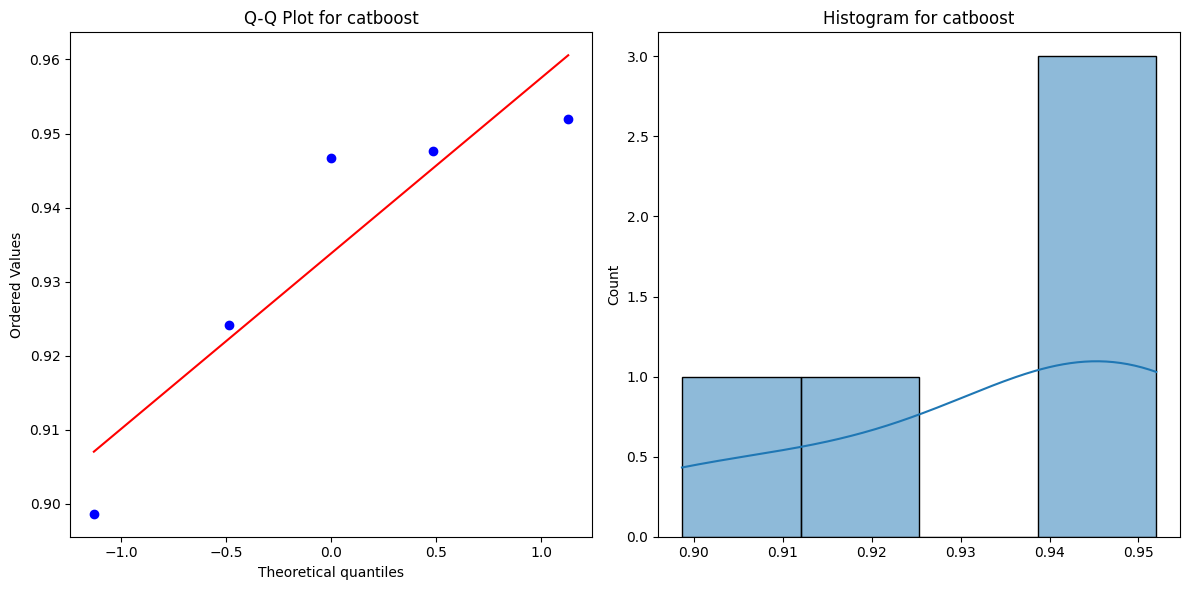

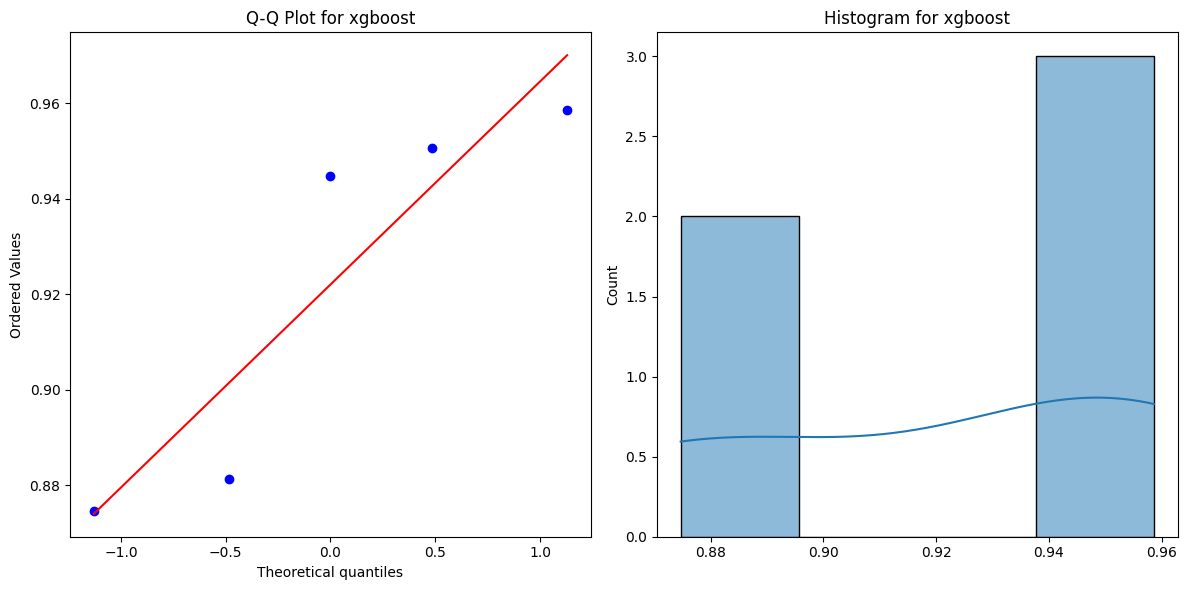

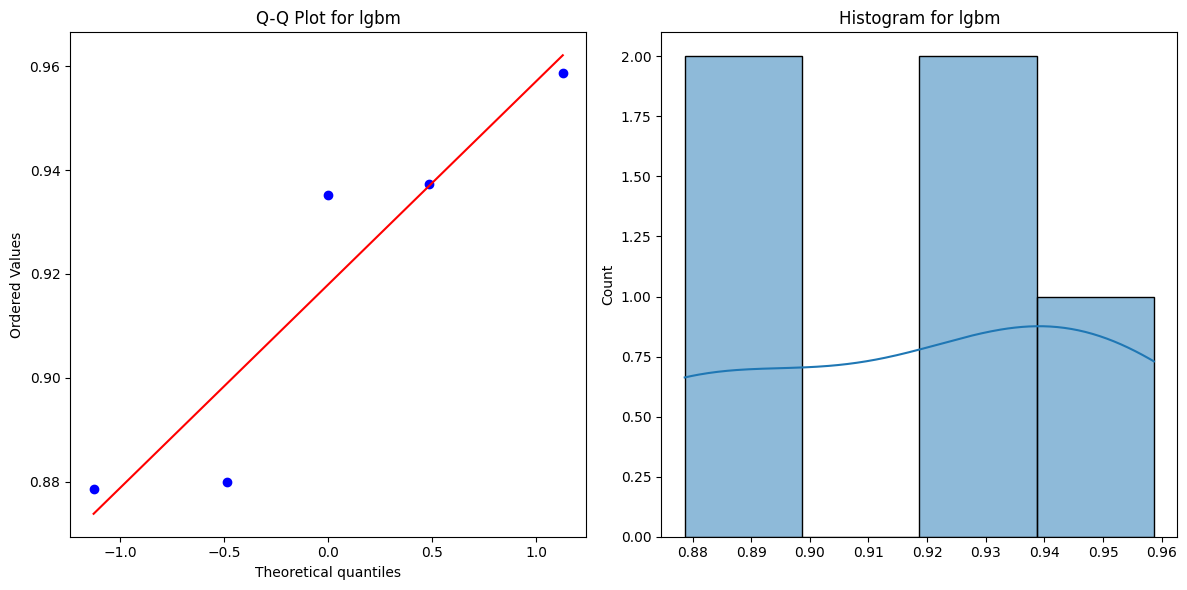

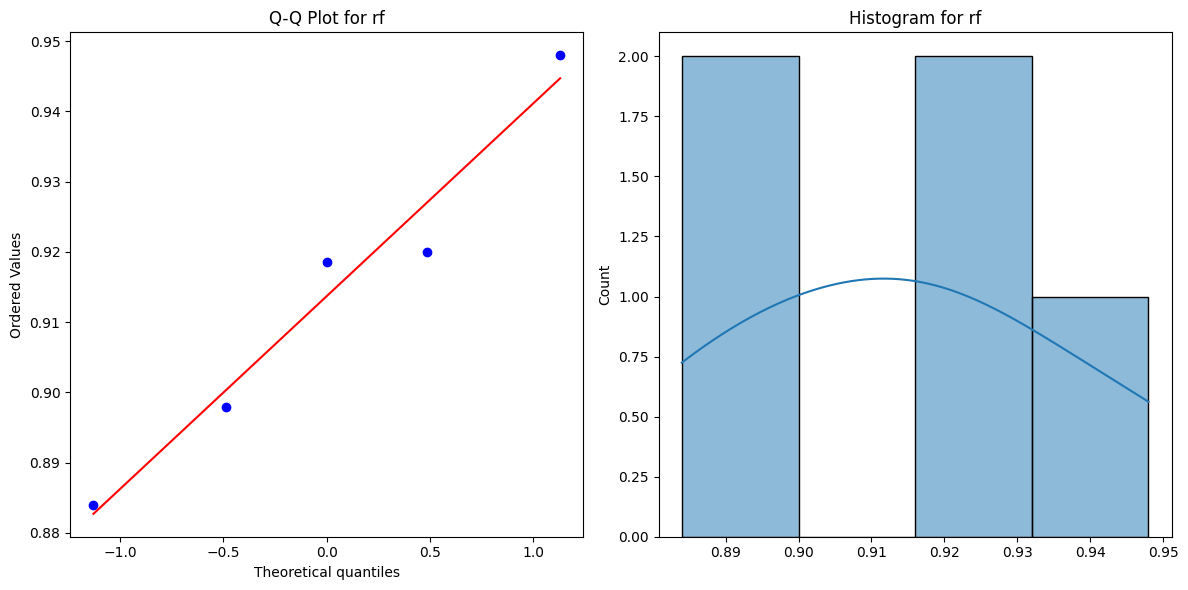

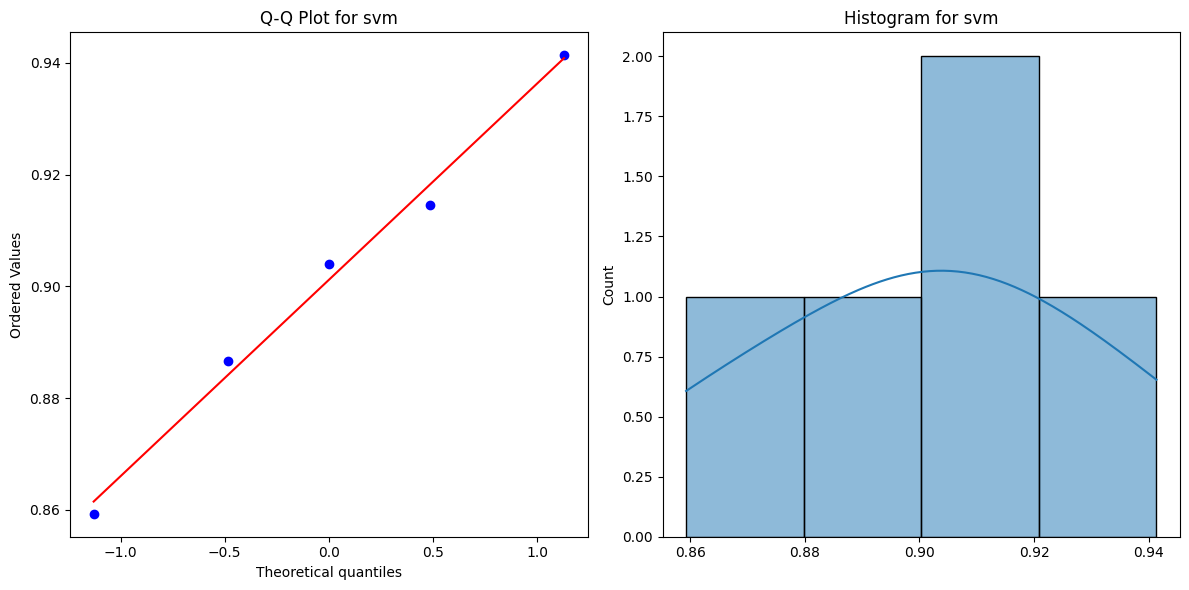

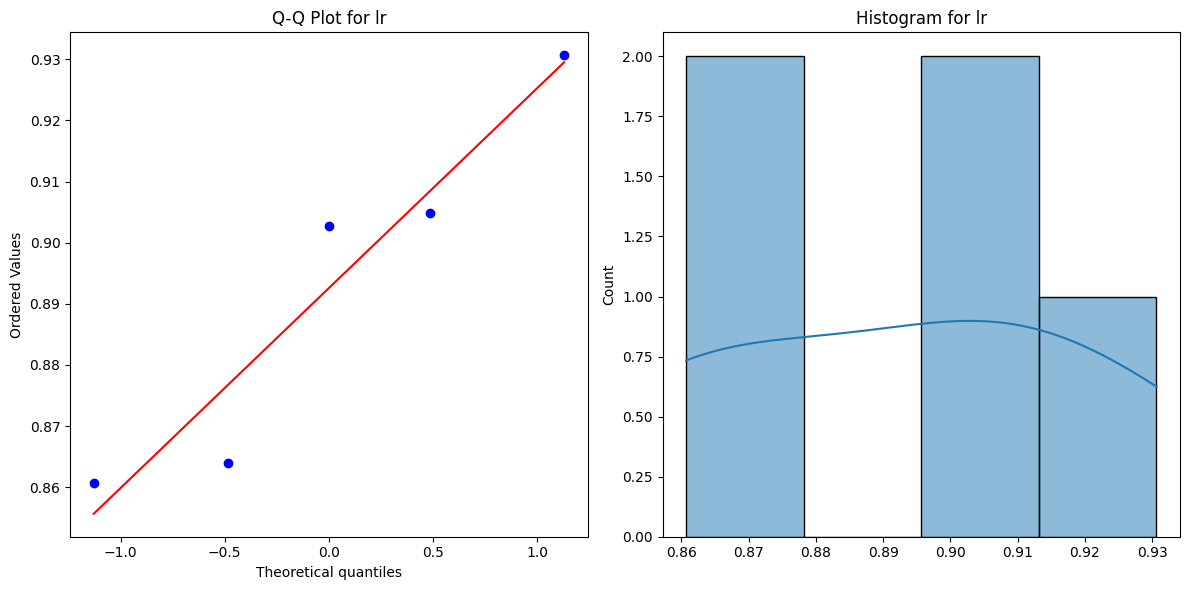

In [38]:
# Plot distribution of AUC score of all models all folds
for model_name in MODEL_NAMES:
    plot_distribution(auc_scores[model_name], model_name)

## 2. Statistical tests